<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Look-at-Training-Set" data-toc-modified-id="Look-at-Training-Set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Look at Training Set</a></span><ul class="toc-item"><li><span><a href="#Add-A-Reviews-Column-With-Float" data-toc-modified-id="Add-A-Reviews-Column-With-Float-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Add A Reviews Column With Float</a></span></li></ul></li></ul></div>

# Goal

Taken from machinehack.com:

In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. 

Size of training set: 6237 records 
Size of test set: 1560 records 

FEATURES: 
- Title: The title of the book 
- Author: The author(s) of the book
- Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) 
- Reviews: The customer reviews about the book 
- Ratings: The customer ratings of the book 
- Synopsis: The synopsis of the book 
- Genre: The genre the book belongs to 
- BookCategory: The department the book is usually available at
- Price: The price of the book (Target variable)

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from datetime import datetime

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline

# import scipy.stats as stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import statsmodels.stats.api as sms

# from sklearn import datasets

# Look at Training Set

In [59]:
df = pd.read_excel("Data_Train.xlsx")

In [60]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [62]:
df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [63]:
# plot price to see outliers
# change some of the columns 
# what to do about synopsis?

(array([5.855e+03, 3.010e+02, 4.400e+01, 2.300e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([   25. ,  1432.5,  2840. ,  4247.5,  5655. ,  7062.5,  8470. ,
         9877.5, 11285. , 12692.5, 14100. ]),
 <BarContainer object of 10 artists>)

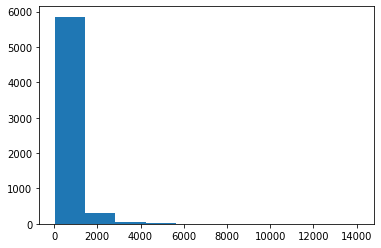

In [64]:
plt.hist(df['Price'])

In [65]:
# how many above 4000, 6000 and 14000
print("more than 4000 price ", len(df[df.Price > 4000]))
print("more than 6000 price ", len(df[df.Price > 6000]))
print("more than 140000 price ", len(df[df.Price > 14000]))

more than 4000 price  43
more than 6000 price  12
more than 140000 price  1


In [66]:
# what is that book that cost so much?
df[df.Price == df.Price.max()]

# it is 36 title box set, seems possible.

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
2455,The Complete Asterix Box Set (36 Titles),Rene Goscinny,"Product Bundle,– 26 Aug 2016",4.9 out of 5 stars,22 customer reviews,"Composed of thirty six, four-colour albums in ...",Comics & Graphic Novels (Books),Comics & Mangas,14100.0


In [67]:
df[df.Price > 6000]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
886,Modern Labor Economics: Theory and Public Poli...,Ronald G. Ehrenberg,"Hardcover,– Import, 27 Oct 1999",4.0 out of 5 stars,1 customer review,Comprehensively surveying the field of labor e...,Labor & Industrial Relations,Politics,13244.67
2455,The Complete Asterix Box Set (36 Titles),Rene Goscinny,"Product Bundle,– 26 Aug 2016",4.9 out of 5 stars,22 customer reviews,"Composed of thirty six, four-colour albums in ...",Comics & Graphic Novels (Books),Comics & Mangas,14100.00
2560,Ranga Roopa: Gods. Words. Images,B.N. Goswamy,"Paperback,– 28 May 2010",4.5 out of 5 stars,10 customer reviews,The delights of Indian art and poetry are brou...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography",9096.00
2607,Fifty Cars that Changed the World: Design Muse...,Design Museum Enterprise Limited,"Hardcover,– 6 Oct 2009",4.0 out of 5 stars,1 customer review,Everything around us is designed and the word ...,"Arts History, Theory & Criticism (Books)","Arts, Film & Photography",11715.12
2818,On the Night of the Seventh Moon: The Classic ...,Victoria Holt,"Paperback,– 2 Mar 2010",5.0 out of 5 stars,1 customer review,"For generations, Victoria Holt has dazzled and...",Romance (Books),Romance,9984.00
3703,The Sandman Omnibus Vol. 1,Neil Gaiman,"Hardcover,– 3 Sep 2013",5.0 out of 5 stars,11 customer reviews,A New York Times Bestseller!\n\nThe Sandman is...,Comics,Comics & Mangas,6840.00
4282,The Sandman Omnibus Vol. 2,Neil Gaiman,"Hardcover,– 12 Nov 2013",5.0 out of 5 stars,4 customer reviews,A New York Times bestseller!\n\nThe Sandman is...,Comics,Comics & Mangas,7195.00
4301,Bleach Box Set 3: Includes vols. 49-74 with pr...,Tite Kubo,"Paperback,– Import, 6 Nov 2018",5.0 out of 5 stars,1 customer review,"Part-time student, full-time Soul Reaper, Ichi...",Mangas,Comics & Mangas,8999.00
4463,Essentials of Strength Training and Conditioning,"G.Gregory Haff, N. Travis Triplett","Hardcover,– 16 Nov 2015",4.5 out of 5 stars,2 customer reviews,Essentials of Strength Training and Conditioni...,Healthy Living & Wellness (Books),Sports,7132.00
5704,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports,7302.00


## Add A Reviews Column With Float 

In [68]:
# try using regex
import re

In [69]:
df.Reviews.astype('str')

0       4.0 out of 5 stars
1       3.9 out of 5 stars
2       4.8 out of 5 stars
3       4.1 out of 5 stars
4       5.0 out of 5 stars
               ...        
6232    5.0 out of 5 stars
6233    3.3 out of 5 stars
6234    3.8 out of 5 stars
6235    3.5 out of 5 stars
6236    3.9 out of 5 stars
Name: Reviews, Length: 6237, dtype: object

In [70]:
# TODO: refine regex 

df['Reviews_float'] = df.Reviews.str.extract('(\d+\.\d+)')

In [71]:
df.dtypes

Title             object
Author            object
Edition           object
Reviews           object
Ratings           object
Synopsis          object
Genre             object
BookCategory      object
Price            float64
Reviews_float     object
dtype: object

In [72]:
df.sample()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Reviews_float
3582,Banker To The Poor: Micro-Lending and the Batt...,Muhammad Yunus,"Paperback,– 8 Jan 2008",4.0 out of 5 stars,1 customer review,Muhammad Yunus is that rare thing: a bona fide...,Banks & Banking,Politics,740.0,4.0


In [90]:
df['Reviews_float'].astype(float)

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: Reviews_float, Length: 6237, dtype: float64

In [94]:
df['Reviews_float'] = pd.to_numeric(df['Reviews_float'], errors='coerce')
# df['strain_float'] = df['strain'].astype(float).round(2)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          6237 non-null   object 
 1   Author         6237 non-null   object 
 2   Edition        6237 non-null   object 
 3   Reviews        6237 non-null   object 
 4   Ratings        6237 non-null   object 
 5   Synopsis       6237 non-null   object 
 6   Genre          6237 non-null   object 
 7   BookCategory   6237 non-null   object 
 8   Price          6237 non-null   float64
 9   Reviews_float  6237 non-null   float64
dtypes: float64(2), object(8)
memory usage: 487.4+ KB


In [96]:
df['Reviews_float'].count

<bound method Series.count of 0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
6232    5.0
6233    3.3
6234    3.8
6235    3.5
6236    3.9
Name: Reviews_float, Length: 6237, dtype: float64>

In [97]:
df['Reviews_float'].count()

6237

In [98]:
df['Reviews_float'].unique()

array([4. , 3.9, 4.8, 4.1, 5. , 4.5, 4.4, 4.7, 4.2, 4.9, 3.5, 3.8, 4.3,
       3.1, 4.6, 2. , 3.7, 3.2, 2.6, 2.8, 3.4, 2.9, 3.3, 3. , 2.5, 1. ,
       3.6, 2.7, 1.5, 2.3, 1.7, 2.2, 1.4, 2.4, 1.6, 2.1])

In [99]:
df['Reviews_float'].nunique()

36

In [100]:
df['Reviews_float'].value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
4.9      75
3.4      75
3.3      57
3.1      49
1.0      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
1.7       1
2.1       1
1.6       1
Name: Reviews_float, dtype: int64

In [101]:
df['Reviews_float'].value_counts().sum()

6237

In [102]:
# doesn't work with floats

df['Reviews_float'].value_counts(bins=4)

# df['Reviews_float'].value_counts(sort=False)

(4.0, 5.0]      4298
(3.0, 4.0]      1615
(2.0, 3.0]       227
(0.995, 2.0]      97
Name: Reviews_float, dtype: int64

In [103]:
df['Reviews_float'].value_counts(ascending=True)

1.6       1
2.1       1
1.7       1
1.4       2
2.2       3
2.4       4
2.6       4
1.5       5
2.3       7
2.8      10
2.7      16
2.5      18
2.9      26
2.0      39
3.2      41
1.0      49
3.1      49
3.3      57
3.4      75
4.9      75
3.6     110
3.5     115
3.0     138
3.7     167
3.8     190
4.8     222
3.9     241
4.1     310
4.2     324
4.7     343
4.3     359
4.4     389
4.6     394
4.5     507
4.0     570
5.0    1375
Name: Reviews_float, dtype: int64

In [104]:
df['Reviews_float'].size

6237

(array([  49.,    9.,   40.,   32.,   56.,  360.,  582., 1121., 1579.,
        2409.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

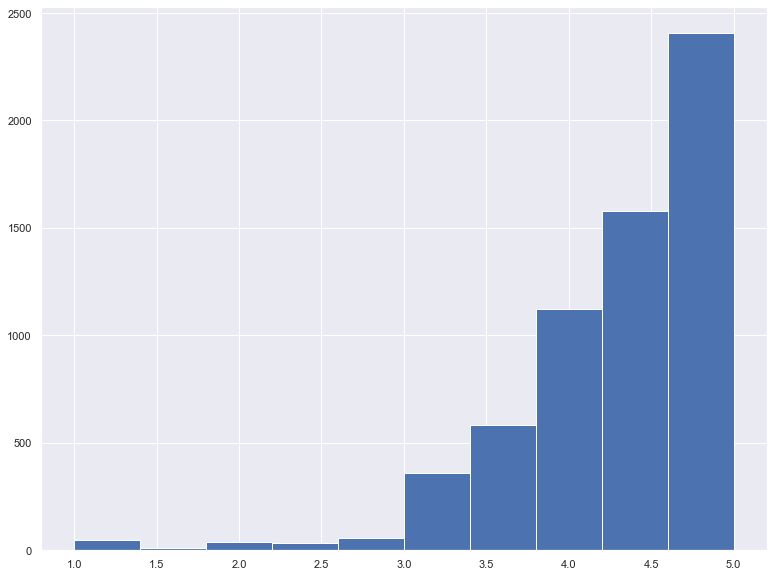

In [105]:
plt.hist(df['Reviews_float'])